### Pobranie potrzebnych bibliotek

In [1]:
import sys

# Tensorflow
if  not 'tensorflow' in sys.modules:
  !pip install tensorflow

# Numpy
if  not 'numpy' in sys.modules:
  !pip install numpy

# SciPy
if  not 'scipy' in sys.modules:
  !pip install scipy

# OpenCV
if  not 'opencv-python' in sys.modules:
  !pip install opencv-python

# Pillow
if  not 'pillow' in sys.modules:
  !pip install pillow

# Matplotlib
if  not 'matplotlib' in sys.modules:
  !pip install matplotlib

# H5py
if  not 'h5py' in sys.modules:
  !pip install h5py

# Keras
if  not 'keras' in sys.modules:
  !pip install keras
  
# wget
if not 'wget' in sys.modules:
  !pip install wget

In [2]:
# pobieramy bibiotekę imageai z repozytorium GitHub
if  not 'imageai' in sys.modules:
  !pip install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl

In [3]:
# Sprawdzamy wersje zaimportowanych pakietów

import tensorflow
# sprawdzamy jego wersje 
print ('Tensorflow version :',tensorflow.__version__)

import numpy
# sprawdzamy jego wersje 
print ('Numpy version :',numpy.__version__)

import scipy
# sprawdzamy jego wersje 
print ('Scipy version :',scipy.__version__)


import matplotlib
# sprawdzamy jego wersje 
print ('Matplotlib version :',matplotlib.__version__)


import h5py
# sprawdzamy jego wersje 
print ('h5py version :',h5py.__version__)


import keras
# sprawdzamy jego wersje 
print ('Keras version :',keras.__version__)


Tensorflow version : 1.13.1
Numpy version : 1.16.2
Scipy version : 1.2.1
Matplotlib version : 3.0.3
h5py version : 2.9.0
Keras version : 2.2.4


Using TensorFlow backend.


### Ustawienie parametrów początkowych

In [4]:
# pobieramy początkowy katalog
import os
home_directory=os.getcwd()
images_directory='images/'
print('home_directory=',home_directory,' images_directory=',images_directory)

home_directory= /home/jovyan/computervision/objectdetecting  images_directory= images/


In [5]:
# zawartosc katalogu domowego
!ls

images	Rozpoznawanie_obiektow_w_obrazach_gotowy_model.ipynb


In [6]:
# lista obrazow w katalogu domowym
!ls -la *.jp*g

ls: cannot access '*.jp*g': No such file or directory


### Budowa pomocniczych funkcji

In [7]:
# pobranie gotowych modeli
def get_ml_models():
  ''' funkcja get_ml_models() pobiera gotowe modele sieci neuronowej dla bibioteki imageai'''

  print("Downloading models.....")
  os.chdir(home_directory)
  os.chdir(images_directory)
  # pobieramy  modele sieci neuronowej
  !wget -c https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5
  #!wget -c https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5
  !wget -c https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo-tiny.h5
  
  execution_path = os.getcwd()
  !ls -la *.h5
  print("Downloading models..end...")

In [8]:
#uruchomienie modelu
def prepare_model(speed="fast"):
  ''' funkcja prepare_model(speed) przygotowuje gotowy model dla bibioteki imageai'''

  print("Preparing models.....")
  from imageai.Detection import ObjectDetection
  import os
  os.chdir(home_directory)
  os.chdir(images_directory)
  execution_path = os.getcwd()
  detector = ObjectDetection()
  detector.setModelTypeAsRetinaNet()
  detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
  detector.loadModel(detection_speed=speed)
  print("Preparing models..end..")
  return detector

In [9]:
# przetworzenie jednego obrazu
def process_image(detector,image_name,min_percent_prob=30):
  ''' funkcja process_image(detector,image_name,min_percent_prob) 
  przetwarza jeden obraz '''

  from imageai.Detection import ObjectDetection
  import os
  global extracted_images
  global detections
  global output_image
  print("Processing images...")
  execution_path = os.getcwd()
  filename=image_name
  input_image=os.path.join(execution_path , filename)
  file_extension=os.path.splitext(filename)[1][1:].strip().lower()
  file_basename=filename.split('.')[0]
  output_filename='out_'+filename
  output_image=os.path.join(execution_path ,'out_'+filename)
  print(input_image," -> ",output_image)
  
  try:
        detections,extracted_images = detector.detectObjectsFromImage(input_image, output_image,extract_detected_objects=True)
        print  ("Input image : ",input_image," Output image: ",output_image)
  except:
        print("Error while processing file : ", input_image)
  #print("Detections:-> ",detections)
  print("Processing images..end..")
  return  output_image,extracted_images,detections


In [10]:
# wyswietlenie obrazu
def show_image(input_image,size=15):
  '''funkcja show_image(input_image,size)
  wyswietla zawartosc jednego obrazu o nazwie input_image'''

  plt.figure(figsize=(size,size))
  plt.axis('off')
  plt.grid(b=None)

  image = mpimg.imread(input_image)
  plt.imshow(image)
  plt.title(input_image)
  plt.show()
  return

In [11]:
 # wyswietlenie wykrytych obiektow 
def show_image_detection(output_image,detections,extracted_images):
  ''' Funkcja show_image_detection(output_image,detections,extracted_images)
  wyswietla wykryte w obrazie obiekty w postaci tekstowej'''

  if (len(detections)>0) : 
    for eachObject in detections:
      print(eachObject["name"] , " : " , eachObject["percentage_probability"] , " : ", eachObject["box_points"] )


In [12]:
# wyswietlenie czesci obrazów 
def show_extracted_images(detections,extracted_images,size=5):
  '''Funkcja show_extracted_images(detections,extracted_images,size=5) 
  wyswietla wykryte w obrazie obiekty w postaci graficznej'''    

  if (len(extracted_images)>0):
    plt.figure(figsize=(size,size))
    plt.axis('off')
    plt.grid(b=None)
    index=0
    if (len(extracted_images))>0:
      for img in extracted_images:
        image = mpimg.imread(img)
        plt.axis('off')
        plt.grid(b=None)
        plt.title(img)
        plt.imshow(image)
        plt.show()
        index+=1


In [13]:
# zaimportowanie obrazow 
def import_images(images_directory,images_dict,delete_existing=True):
  '''Funkcja  import_images(images_directory,images_dict,delete_existing=True)
  pobiera na podstawie danych w slowniku images_dict
  obrazy lokalnie'''

  import wget
  import glob
  print("Importing images...")
  os.chdir(home_directory)
  if not os.path.exists(images_directory):
    os.makedirs(images_directory)

  os.chdir(images_directory)

  execution_path = os.getcwd()
  #print (execution_path)

  if (delete_existing) :
    # pobieramy liste plikow o ustalonym rozszerzeniu
    fileList = glob.glob('*.jp*g')
    # Itaracja po kazdym z plikow wraz z jego usunieciem.
    for filePath in fileList:
      try:
        os.remove(filePath)
      except:
        print("Error while deleting file : ", filePath)
        

  for i_name, i_url in images_dict.items():
    print("(i_name,i_url): ",i_name,i_url) 
    wget.download(i_url, i_name)  
   
  !ls -la *.jp*g
  
  print("Importing images..end...")
  
  return()
  

### Uruchomienie procesu przetwarzania  detekcji obiektów na zdjęciach

home_directory->  /home/jovyan/computervision/objectdetecting
{'corpus-christi1.jpg': 'https://1dayoutofwarsaw.pl/userdata/gfx/68d6db5cdbabb4de25cdfdcf66595aa2.jpg', 'rzeka_bzura.jpg': 'https://4.bp.blogspot.com/-y_Mp1ZofdpA/UmzL2EF2JRI/AAAAAAAAzVs/KbGtXB5gXzk/s400/26+%25C5%2581owicz+ul.Mostowa+rzeka+Bzura+B195.jpg', 'rodzina-krolewska.jpg': 'http://bi.gazeta.pl/im/05/df/11/z18741509V,Starsi-czlonkowie-rodziny-krolewskiej-balkonie-Pal.jpg', 'informatycy.jpg': 'http://cdn1.thumbs.common.smcloud.net/common/2/4/s/2423986xy0Z.jpg/ru-1-r-640,0-n-2423986xy0Z.jpg'}
Importing images...
(i_name,i_url):  corpus-christi1.jpg https://1dayoutofwarsaw.pl/userdata/gfx/68d6db5cdbabb4de25cdfdcf66595aa2.jpg
(i_name,i_url):  rzeka_bzura.jpg https://4.bp.blogspot.com/-y_Mp1ZofdpA/UmzL2EF2JRI/AAAAAAAAzVs/KbGtXB5gXzk/s400/26+%25C5%2581owicz+ul.Mostowa+rzeka+Bzura+B195.jpg
(i_name,i_url):  rodzina-krolewska.jpg http://bi.gazeta.pl/im/05/df/11/z18741509V,Starsi-czlonkowie-rodziny-krolewskiej-balkonie-Pal.jpg


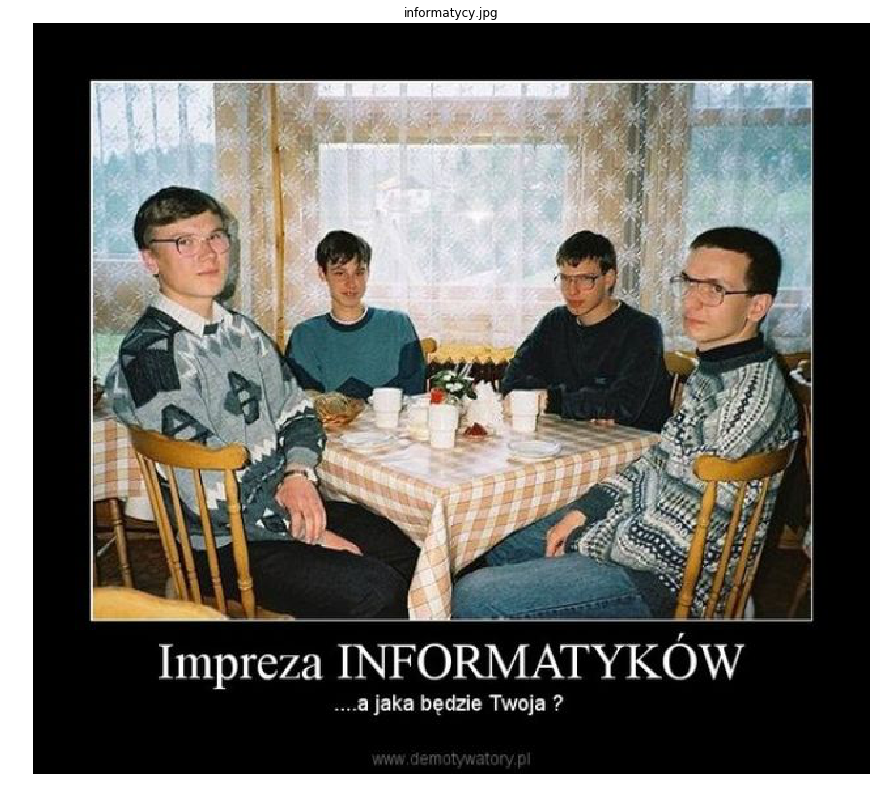

Processing images...
/home/jovyan/computervision/objectdetecting/images/informatycy.jpg  ->  /home/jovyan/computervision/objectdetecting/images/out_informatycy.jpg
Input image :  /home/jovyan/computervision/objectdetecting/images/informatycy.jpg  Output image:  /home/jovyan/computervision/objectdetecting/images/out_informatycy.jpg
Processing images..end..


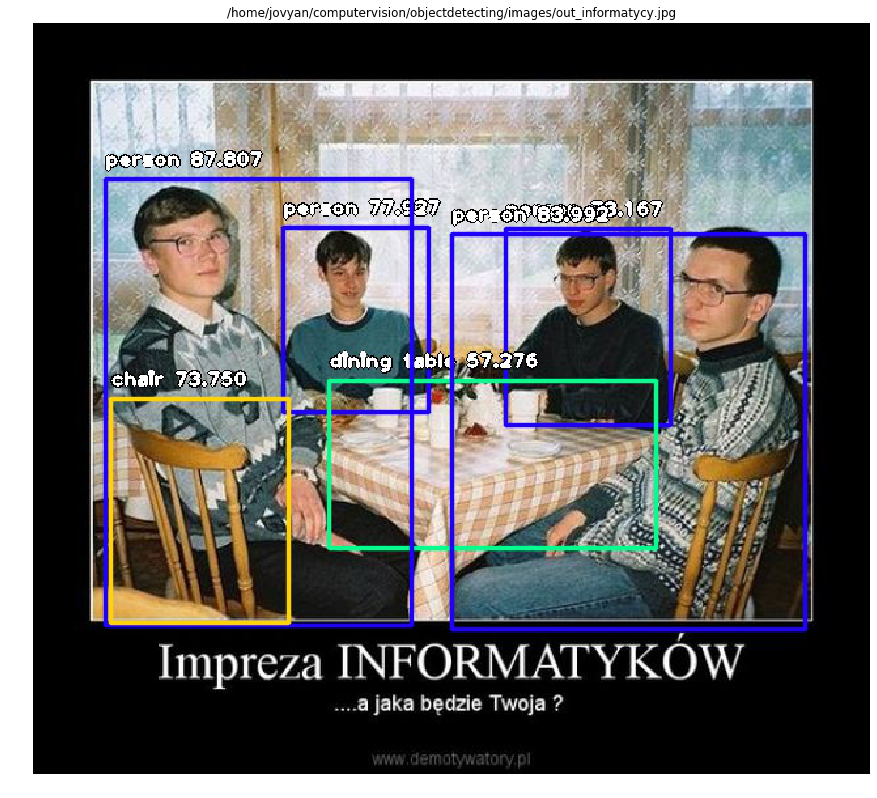

person  :  77.92700529098511  :  [191 156 302 297]
person  :  73.16680550575256  :  [361 157 487 307]
dining table  :  57.27636218070984  :  [226 273 476 401]
person  :  87.80670166015625  :  [ 55 119 289 460]
person  :  83.99155139923096  :  [320 161 590 463]
chair  :  73.75041842460632  :  [ 59 287 195 458]


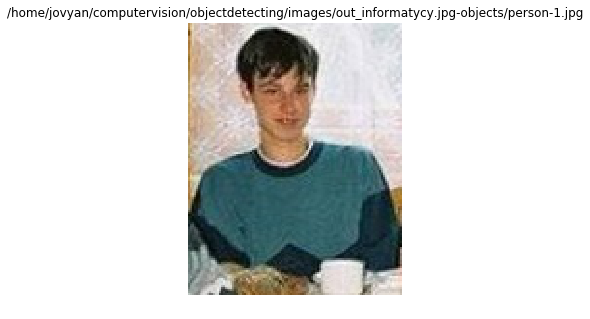

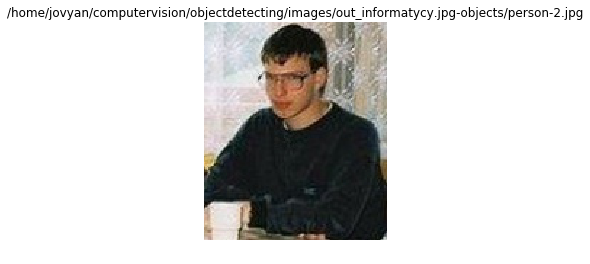

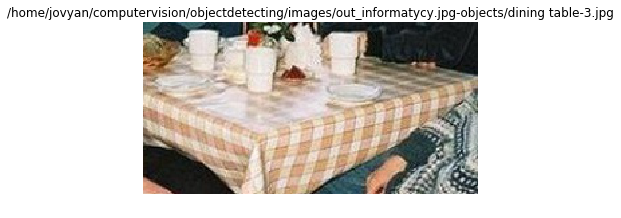

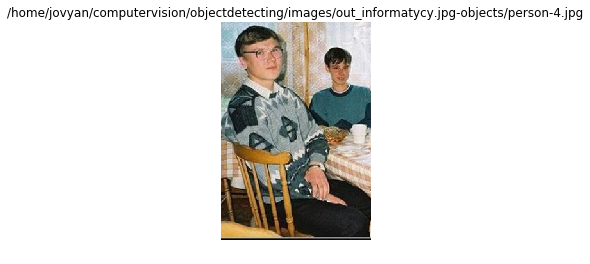

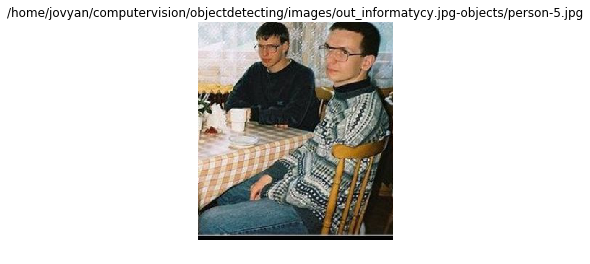

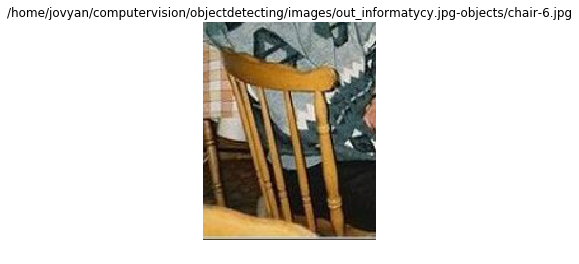

image_name:-> rzeka_bzura.jpg


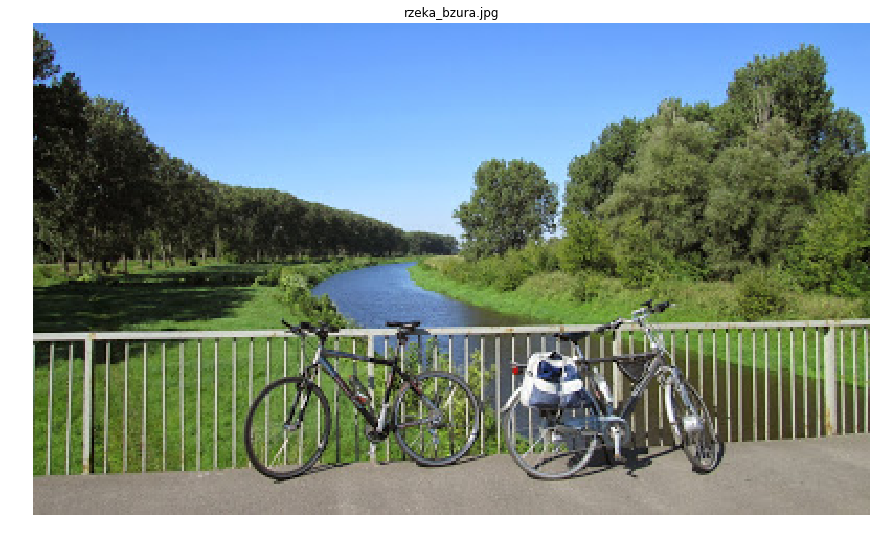

Processing images...
/home/jovyan/computervision/objectdetecting/images/rzeka_bzura.jpg  ->  /home/jovyan/computervision/objectdetecting/images/out_rzeka_bzura.jpg
Input image :  /home/jovyan/computervision/objectdetecting/images/rzeka_bzura.jpg  Output image:  /home/jovyan/computervision/objectdetecting/images/out_rzeka_bzura.jpg
Processing images..end..


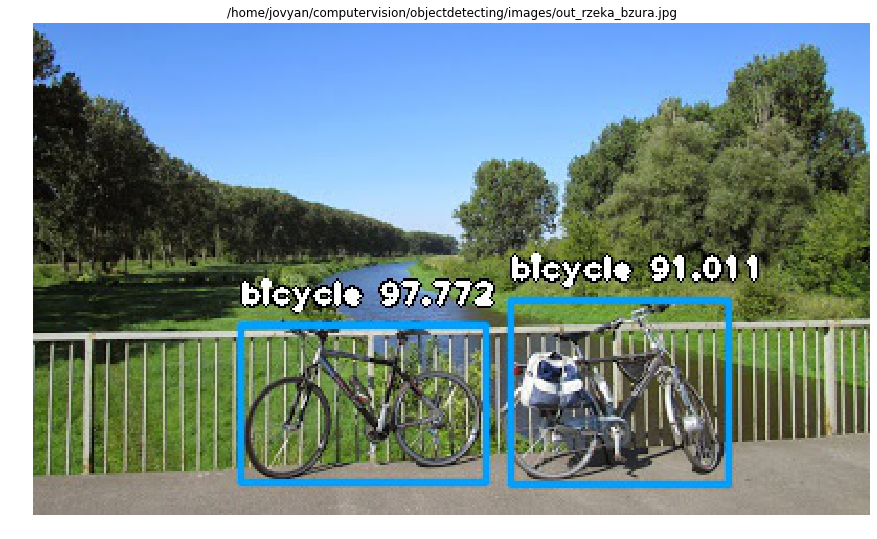

bicycle  :  97.77223467826843  :  [ 99 144 216 219]
bicycle  :  91.01149439811707  :  [228 132 332 220]


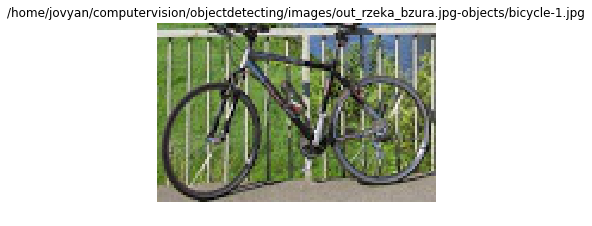

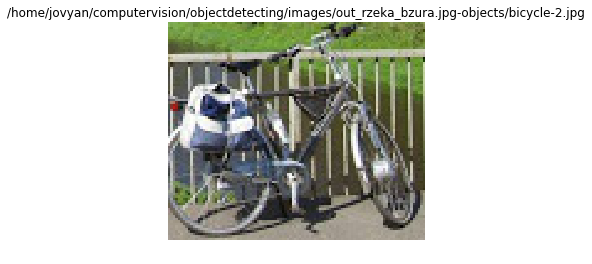

image_name:-> corpus-christi1.jpg


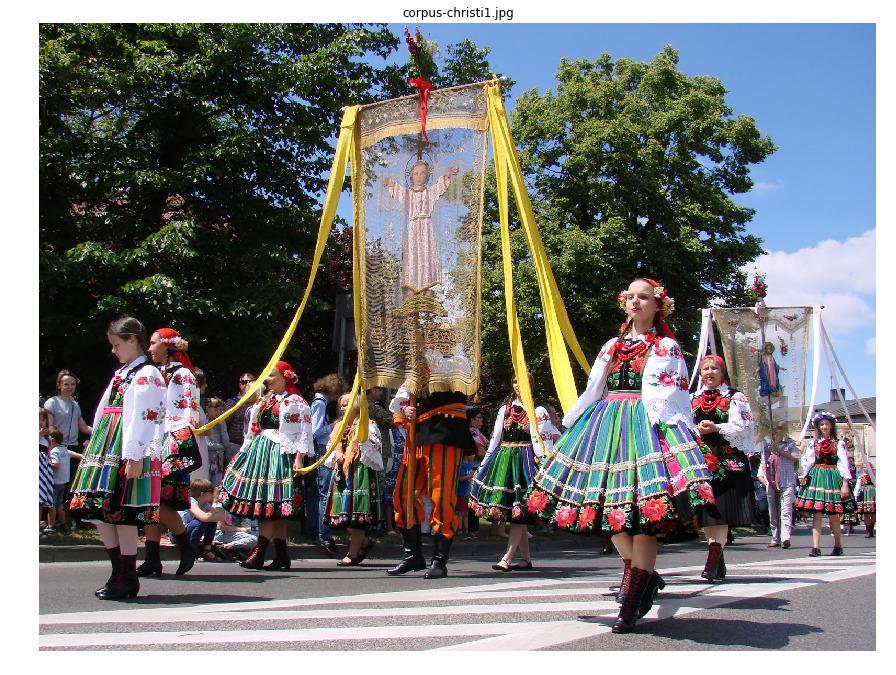

Processing images...
/home/jovyan/computervision/objectdetecting/images/corpus-christi1.jpg  ->  /home/jovyan/computervision/objectdetecting/images/out_corpus-christi1.jpg
Input image :  /home/jovyan/computervision/objectdetecting/images/corpus-christi1.jpg  Output image:  /home/jovyan/computervision/objectdetecting/images/out_corpus-christi1.jpg
Processing images..end..


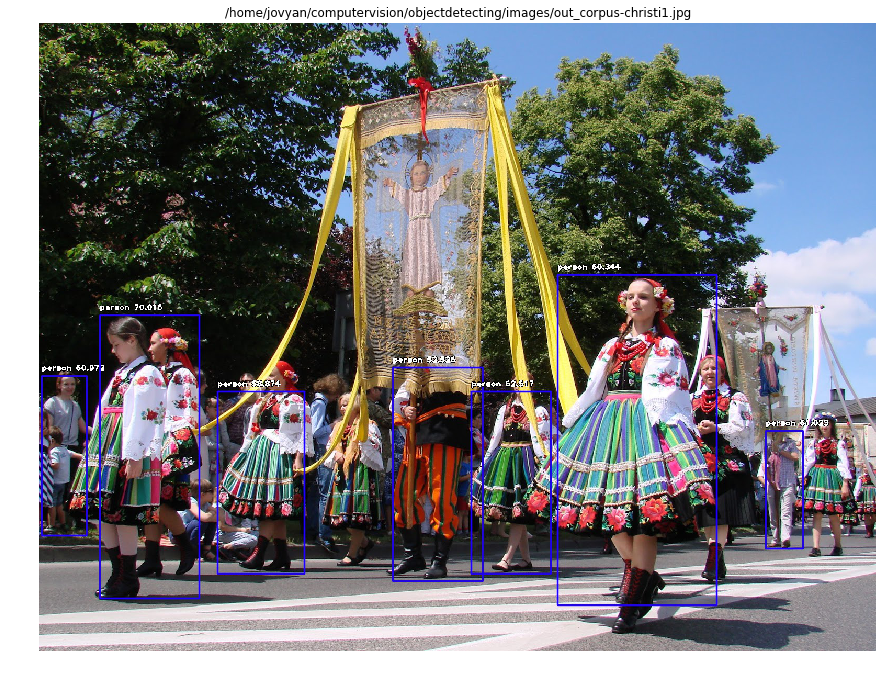

person  :  60.97208261489868  :  [  5 674  91 979]
person  :  61.02311611175537  :  [1389  779 1460 1004]
person  :  70.01529932022095  :  [ 116  558  306 1099]
person  :  58.8739275932312  :  [ 341  704  507 1052]
person  :  52.525871992111206  :  [ 676  658  848 1066]
person  :  62.51736283302307  :  [ 826  704  978 1052]
person  :  60.34356951713562  :  [ 991  481 1295 1112]


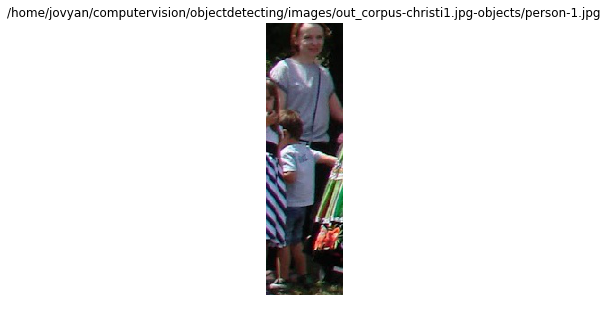

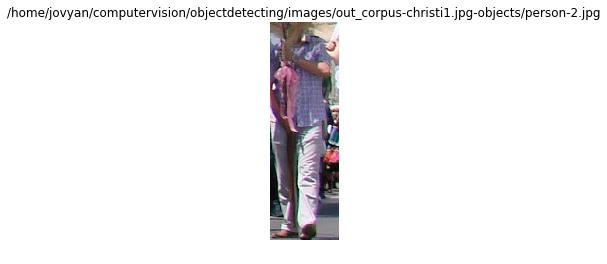

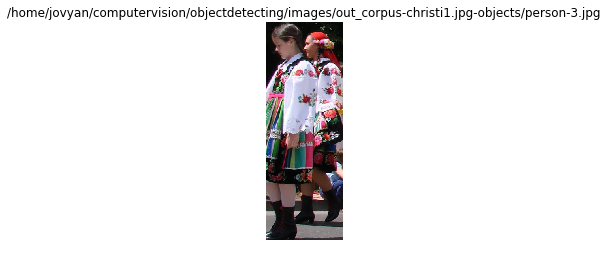

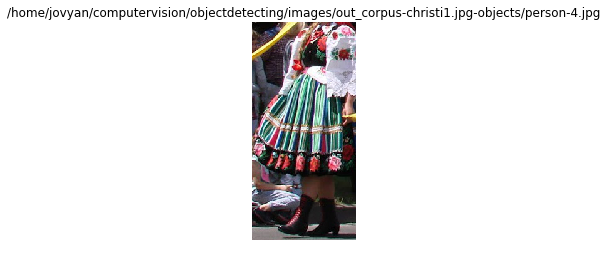

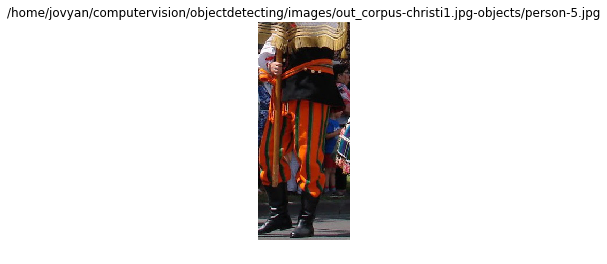

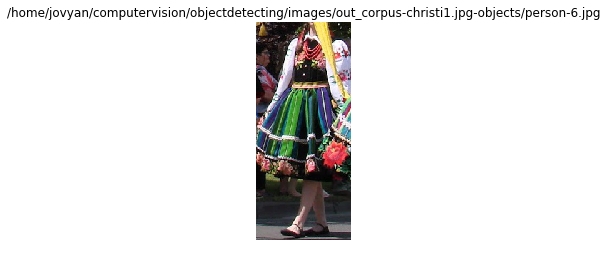

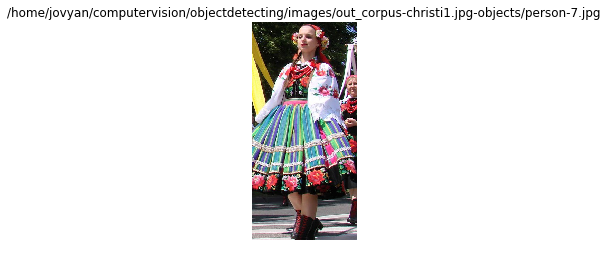

image_name:-> rodzina-krolewska.jpg


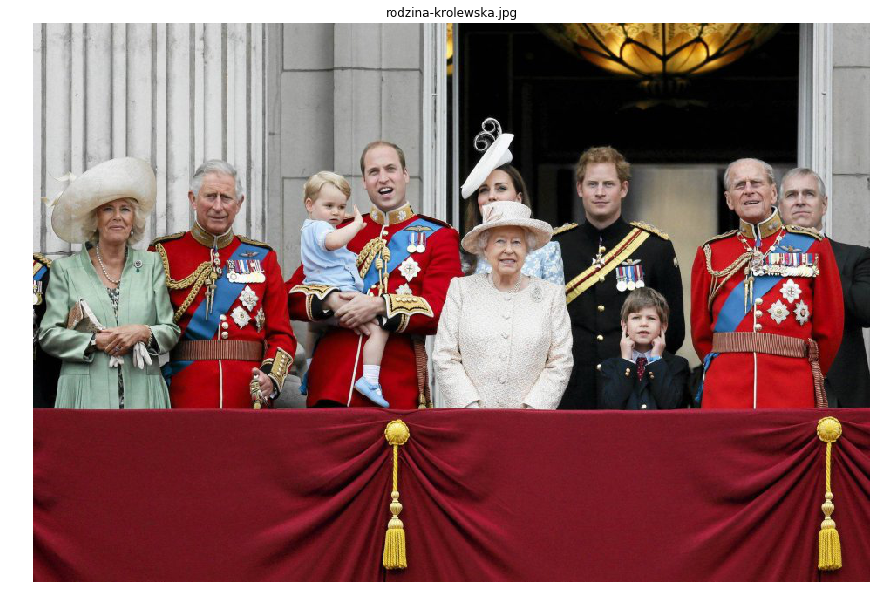

Processing images...
/home/jovyan/computervision/objectdetecting/images/rodzina-krolewska.jpg  ->  /home/jovyan/computervision/objectdetecting/images/out_rodzina-krolewska.jpg
Input image :  /home/jovyan/computervision/objectdetecting/images/rodzina-krolewska.jpg  Output image:  /home/jovyan/computervision/objectdetecting/images/out_rodzina-krolewska.jpg
Processing images..end..


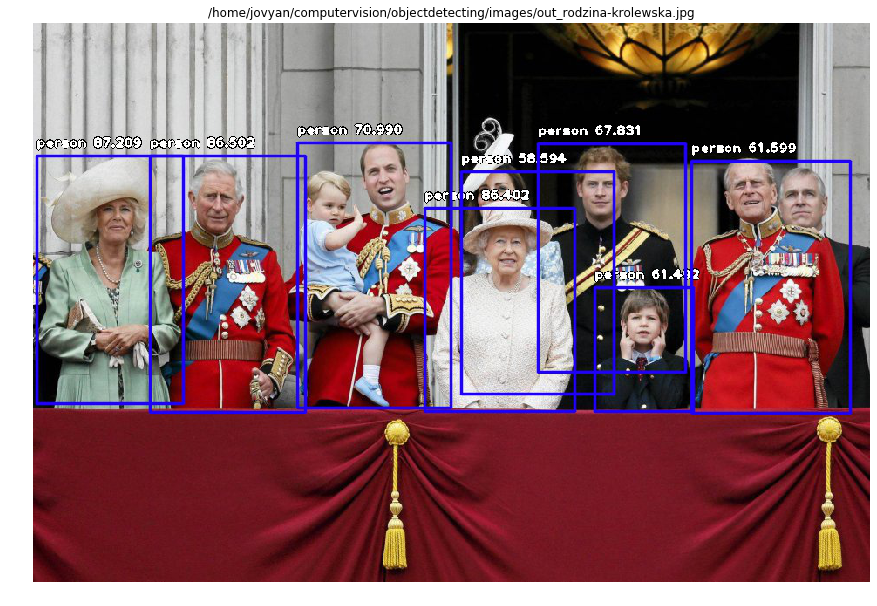

person  :  86.40187978744507  :  [449 212 621 445]
person  :  61.49199604988098  :  [644 303 757 445]
person  :  86.50233745574951  :  [134 152 312 446]
person  :  58.59360694885254  :  [491 170 666 425]
person  :  67.83086061477661  :  [579 138 748 400]
person  :  87.20932602882385  :  [  4 152 172 436]
person  :  70.99010944366455  :  [303 137 479 441]
person  :  61.59932017326355  :  [755 158 937 447]


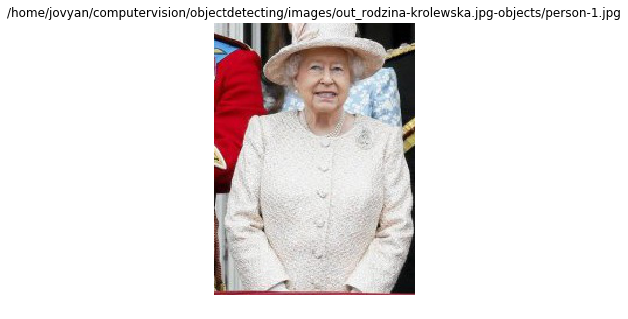

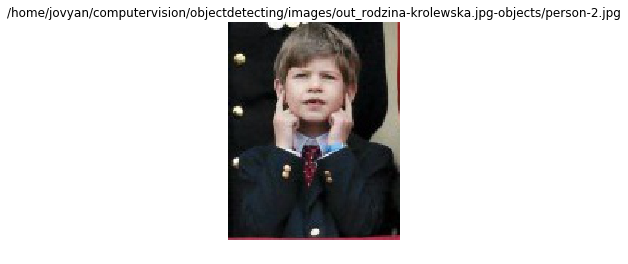

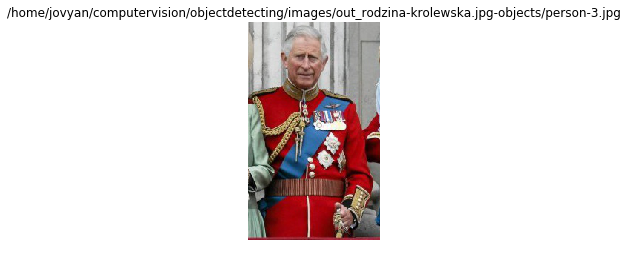

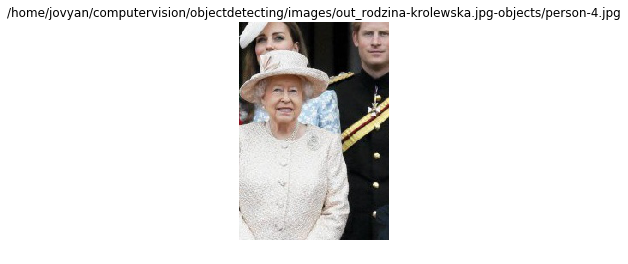

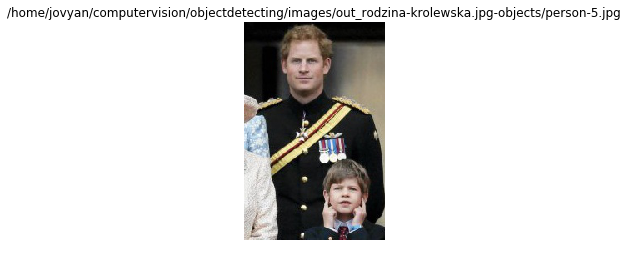

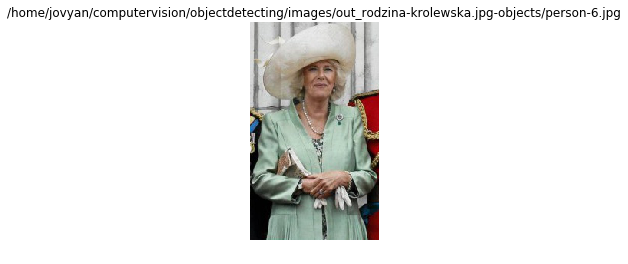

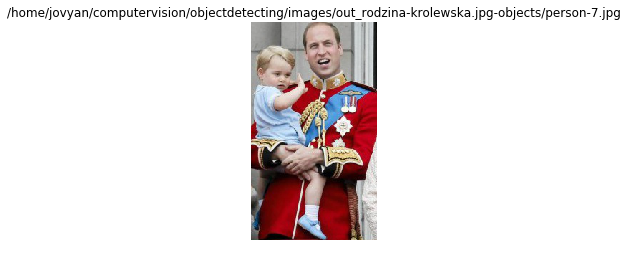

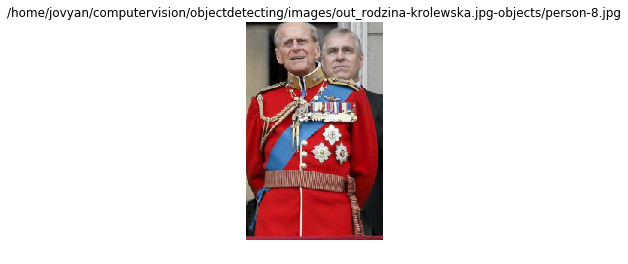

In [15]:
# uruchomienie głownego skryptu przetwarzajacego detekcje obiektow w obrazach
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from imageai.Detection import ObjectDetection
import os
import glob

global extracted_images
global detections
global output_image

# pobieramy początkowy katalog

#home_directory=os.getcwd()
print("home_directory-> ",home_directory)

os.chdir(home_directory)

images_directory='images/'
execution_path = os.getcwd()


images_dict =	{
  "corpus-christi1.jpg": "https://1dayoutofwarsaw.pl/userdata/gfx/68d6db5cdbabb4de25cdfdcf66595aa2.jpg", 
  "rzeka_bzura.jpg" : "https://4.bp.blogspot.com/-y_Mp1ZofdpA/UmzL2EF2JRI/AAAAAAAAzVs/KbGtXB5gXzk/s400/26+%25C5%2581owicz+ul.Mostowa+rzeka+Bzura+B195.jpg" , 
  "rodzina-krolewska.jpg": "http://bi.gazeta.pl/im/05/df/11/z18741509V,Starsi-czlonkowie-rodziny-krolewskiej-balkonie-Pal.jpg",
  "informatycy.jpg":  "http://cdn1.thumbs.common.smcloud.net/common/2/4/s/2423986xy0Z.jpg/ru-1-r-640,0-n-2423986xy0Z.jpg"

}
# wyswietlenie zawartosci slownika
print(images_dict)

# pobranie obrazow
import_images(images_directory,images_dict,delete_existing=True)


# pobranie gotowego modelu
get_ml_models()
  
# przygotowanie modelu
detector=prepare_model(speed="fast")


os.chdir(home_directory)
images_directory='images/'
os.chdir(images_directory)
execution_path = os.getcwd()
print ('execution_path ->',execution_path)

# lista plikow do przeprocesowania
included_extensions = ['jpg','jpeg']
file_names = [fn for fn in os.listdir(execution_path)
              if any(fn.endswith(ext) for ext in included_extensions)]

for image_name in file_names:
  print("image_name:->",image_name)

  # obraz na wejsciu
  show_image(image_name,15)
  output_image,extracted_images,detections = process_image(detector,image_name)

  # obraz na wyjsciu
  show_image(output_image,15)

  # co zostało wykryte
  show_image_detection(output_image,detections,extracted_images)

  # dodatkowe obrazy
  show_extracted_images(detections,extracted_images,5)

del detector
